In [513]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error as mse, mean_absolute_error as mae

url = 'marketing_customer_analysis_clean.csv'
df = pd.read_csv(url)

In [514]:
# Separate the columns
categoricals_df = df.select_dtypes(include='object')
numericals_df = df.select_dtypes(include='number')

## Categorical

In [515]:
# Create new Dataframes splitt in nominal and ordinal
nominal_columns = ['state', 'response', 'employmentstatus', 'gender', 
                   'location_code', 'marital_status', 'policy_type', 
                   'sales_channel', 'policy','vehicle_class', 'vehicle_type', 'renew_offer_type']
nominal_df = categoricals_df[nominal_columns]

In [516]:
# Create new Dataframes splitt in nominal and ordinal
ordinal_columns = ['coverage','education', 'vehicle_size']
ordinal_df = categoricals_df[ordinal_columns]

In [517]:
# get_dummies with all the norminal columns
con_norminals_df = pd.get_dummies(nominal_df, dtype=int)
con_norminals_df

,state_Arizona,state_California,state_Nevada,state_Oregon,state_Washington,response_No,response_Yes,employmentstatus_Disabled,employmentstatus_Employed,employmentstatus_Medical Leave,...,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,vehicle_type_A,renew_offer_type_Offer1,renew_offer_type_Offer2,renew_offer_type_Offer3,renew_offer_type_Offer4
0,1,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
1,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
2,0,0,0,0,1,1,0,0,1,0,...,0,0,1,0,0,1,0,0,1,0
3,0,0,0,1,0,0,1,0,1,0,...,0,0,0,0,0,1,0,1,0,0
4,0,0,0,1,0,1,0,0,0,1,...,0,0,0,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,0,0,1,0,0,1,0,0,0,0,...,1,0,0,0,0,1,0,0,1,0
10906,0,0,0,1,0,1,0,0,1,0,...,0,0,0,0,0,1,0,1,0,0
10907,1,0,0,0,0,1,0,0,1,0,...,0,1,0,0,0,1,1,0,0,0
10908,0,1,0,0,0,1,0,0,1,0,...,0,0,1,0,0,1,1,0,0,0


In [518]:
# For 'coverage' column
enc = OrdinalEncoder(categories=[['Basic', 'Extended', 'Premium']])
ordinal_df['coverage'] = enc.fit_transform(ordinal_df[['coverage']])

# For 'education' column
enc = OrdinalEncoder(categories=[['High School or Below', 'Bachelor', 'College', 'Master', 'Doctor']])
ordinal_df['education'] = enc.fit_transform(ordinal_df[['education']])

# For 'vehicle_size' column
enc = OrdinalEncoder(categories=[['Small', 'Medsize', 'Large']])
ordinal_df['vehicle_size'] = enc.fit_transform(ordinal_df[['vehicle_size']])

C:\Users\vonke\AppData\Local\Temp\ipykernel_5708\2652735968.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ordinal_df['coverage'] = enc.fit_transform(ordinal_df[['coverage']])
C:\Users\vonke\AppData\Local\Temp\ipykernel_5708\2652735968.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ordinal_df['education'] = enc.fit_transform(ordinal_df[['education']])
C:\Users\vonke\AppData\Local\Temp\ipykernel_5708\2652735968.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a 

In [519]:
# Concat the two categorical Dataframes

result_categorical_df = pd.concat([ordinal_df, con_norminals_df], axis=1)
result_categorical_df

,coverage,education,vehicle_size,state_Arizona,state_California,state_Nevada,state_Oregon,state_Washington,response_No,response_Yes,...,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,vehicle_type_A,renew_offer_type_Offer1,renew_offer_type_Offer2,renew_offer_type_Offer3,renew_offer_type_Offer4
0,0.0,2.0,1.0,1,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
1,0.0,2.0,1.0,0,1,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1
2,0.0,1.0,1.0,0,0,0,0,1,1,0,...,0,0,1,0,0,1,0,0,1,0
3,1.0,2.0,1.0,0,0,0,1,0,0,1,...,0,0,0,0,0,1,0,1,0,0
4,2.0,1.0,1.0,0,0,0,1,0,1,0,...,0,0,0,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,2.0,1.0,1.0,0,0,1,0,0,1,0,...,1,0,0,0,0,1,0,0,1,0
10906,0.0,2.0,1.0,0,0,0,1,0,1,0,...,0,0,0,0,0,1,0,1,0,0
10907,1.0,1.0,1.0,1,0,0,0,0,1,0,...,0,1,0,0,0,1,1,0,0,0
10908,2.0,2.0,1.0,0,1,0,0,0,1,0,...,0,0,1,0,0,1,1,0,0,0


## Numberical

In [520]:
# Drop NAN and duplicates
numericals_df = numericals_df.dropna()
numericals_df = numericals_df.drop_duplicates()


## Concat both

In [521]:
final_df = pd.concat([result_categorical_df, numericals_df], axis=1)
final_df = final_df.drop(columns=['month', 'unnamed:_0'])
final_df

,coverage,education,vehicle_size,state_Arizona,state_California,state_Nevada,state_Oregon,state_Washington,response_No,response_Yes,...,renew_offer_type_Offer3,renew_offer_type_Offer4,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,0.0,2.0,1.0,1,0,0,0,0,1,0,...,1,0,4809.216960,48029,61,7.000000,52,0.000000,9,292.800000
1,0.0,2.0,1.0,0,1,0,0,0,1,0,...,0,1,2228.525238,0,64,3.000000,26,0.000000,1,744.924331
2,0.0,1.0,1.0,0,0,0,0,1,1,0,...,1,0,14947.917300,22139,100,34.000000,31,0.000000,2,480.000000
3,1.0,2.0,1.0,0,0,0,1,0,0,1,...,0,0,22332.439460,49078,97,10.000000,3,0.000000,2,484.013411
4,2.0,1.0,1.0,0,0,0,1,0,1,0,...,0,0,9025.067525,23675,117,15.149071,31,0.384256,7,707.925645
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,2.0,1.0,1.0,0,0,1,0,0,1,0,...,1,0,15563.369440,0,253,15.149071,40,0.384256,7,1214.400000
10906,0.0,2.0,1.0,0,0,0,1,0,1,0,...,0,0,5259.444853,61146,65,7.000000,68,0.000000,6,273.018929
10907,1.0,1.0,1.0,1,0,0,0,0,1,0,...,0,0,23893.304100,39837,201,11.000000,63,0.000000,2,381.306996
10908,2.0,2.0,1.0,0,1,0,0,0,1,0,...,0,0,11971.977650,64195,158,0.000000,27,4.000000,6,618.288849


### X-y Splitt

In [522]:
final_df.columns

Index(['coverage', 'education', 'vehicle_size', 'state_Arizona',
       'state_California', 'state_Nevada', 'state_Oregon', 'state_Washington',
       'response_No', 'response_Yes', 'employmentstatus_Disabled',
       'employmentstatus_Employed', 'employmentstatus_Medical Leave',
       'employmentstatus_Retired', 'employmentstatus_Unemployed', 'gender_F',
       'gender_M', 'location_code_Rural', 'location_code_Suburban',
       'location_code_Urban', 'marital_status_Divorced',
       'marital_status_Married', 'marital_status_Single',
       'policy_type_Corporate Auto', 'policy_type_Personal Auto',
       'policy_type_Special Auto', 'sales_channel_Agent',
       'sales_channel_Branch', 'sales_channel_Call Center',
       'sales_channel_Web', 'policy_Corporate L1', 'policy_Corporate L2',
       'policy_Corporate L3', 'policy_Personal L1', 'policy_Personal L2',
       'policy_Personal L3', 'policy_Special L1', 'policy_Special L2',
       'policy_Special L3', 'vehicle_class_Four-Door Ca

In [523]:
X = final_df[['coverage', 'education', 'vehicle_size', 'state_Arizona',
       'state_California', 'state_Nevada', 'state_Oregon', 'state_Washington',
       'response_No', 'response_Yes', 'employmentstatus_Disabled',
       'employmentstatus_Employed', 'employmentstatus_Medical Leave',
       'employmentstatus_Retired', 'employmentstatus_Unemployed', 'gender_F',
       'gender_M', 'location_code_Rural', 'location_code_Suburban',
       'location_code_Urban', 'marital_status_Divorced',
       'marital_status_Married', 'marital_status_Single',
       'policy_type_Corporate Auto', 'policy_type_Personal Auto',
       'policy_type_Special Auto', 'sales_channel_Agent',
       'sales_channel_Branch', 'sales_channel_Call Center',
       'sales_channel_Web', 'policy_Corporate L1', 'policy_Corporate L2',
       'policy_Corporate L3', 'policy_Personal L1', 'policy_Personal L2',
       'policy_Personal L3', 'policy_Special L1', 'policy_Special L2',
       'policy_Special L3', 'vehicle_class_Four-Door Car',
       'vehicle_class_Luxury Car', 'vehicle_class_Luxury SUV',
       'vehicle_class_SUV', 'vehicle_class_Sports Car',
       'vehicle_class_Two-Door Car', 'vehicle_type_A',
       'renew_offer_type_Offer1', 'renew_offer_type_Offer2',
       'renew_offer_type_Offer3', 'renew_offer_type_Offer4',
       'customer_lifetime_value', 'income', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies']]
y = final_df[['total_claim_amount']]

### Train test split

In [524]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state= 42)

### Standardize the data (after the data split!)

In [525]:
# MinMaxScaler X_train
# scaler = MinMaxScaler()
# X_train = scaler.fit_transform(X_train)

In [526]:
# MinMaxScaler X_test
# X_test = scaler.transform(X_test)

In [527]:
#PowerTransform y_train
pt = PowerTransformer()
X_train = pt.fit_transform(X_train)

In [528]:
#PowerTransform y_test
X_test = pt.transform(X_test)

In [529]:
#PowerTransform y_train
pt = PowerTransformer()
y_train = pt.fit_transform(y_train)

In [530]:
#PowerTransform y_test
y_test = pt.transform(y_test)

### Apply linear regression

In [531]:
ln = LinearRegression()
model = ln.fit(X_train, y_train)

In [532]:
model.coef_

array([[ 3.82845105e-02, -2.16973159e-02, -1.07638012e-02,
         2.30977229e+12,  2.94103238e+12,  1.73607961e+12,
         2.68972819e+12,  1.68185805e+12,  2.49619294e+12,
         2.49619294e+12, -4.02618209e+11, -9.23899720e+11,
        -4.07073951e+11, -3.23163441e+11, -8.29820701e+11,
         2.45230956e+12,  2.45230956e+12, -2.21563750e+12,
        -2.71128853e+12, -2.14500266e+12, -2.00838759e+12,
        -2.76565682e+12, -2.48447834e+12,  1.23446060e+12,
         1.11651537e+12, -2.66079884e+12,  1.39163655e+12,
         1.28322779e+12,  1.14433220e+12,  1.01893422e+12,
        -1.34939908e+12, -1.68142738e+12, -2.20054014e+12,
        -2.22369019e+12, -2.73284741e+12, -3.14583265e+12,
         8.45564509e+11,  1.28062387e+12,  1.14847175e+12,
        -6.44334087e+10, -1.67440212e+10, -1.79325029e+10,
        -5.00233361e+10, -2.85242086e+10, -5.13425244e+10,
        -6.10351562e-04,  3.47559851e+12,  3.29204700e+12,
         2.59117729e+12,  2.19655056e+12,  1.79443359e-0

In [533]:
model.intercept_

array([0.00020929])

### Create predictions for the test set

In [534]:
y_pred = model.predict(X_test)

In [535]:
# inverse transforming predictions
pt.inverse_transform(y_pred)

C:\Users\vonke\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(


array([[384.83793936],
       [421.82889468],
       [484.41063095],
       ...,
       [ 83.1358385 ],
       [507.23192125],
       [ 38.47412832]])

In [536]:
y_pred = pd.DataFrame(y_pred)

In [537]:
y_test = pd.DataFrame(y_test)
y_test = y_test.reset_index(drop=True)

In [538]:
y_test = y_test.rename(columns={0: 'y_test'})

In [539]:
residuals_df = pd.concat([y_test,y_pred], axis=1)

In [540]:
residuals_df = residuals_df.rename(columns={0: 'y_pred'})

In [541]:
residuals_df['residual'] = residuals_df['y_test'] - residuals_df['y_pred']

In [542]:
residuals_df

,y_test,y_pred,residual
0,0.321838,0.008995,0.312843
1,-0.120340,0.141111,-0.261451
2,0.344533,0.351041,-0.006508
3,0.907717,0.640328,0.267389
4,-0.312689,-0.189590,-0.123100
...,...,...,...
2723,0.271899,0.352680,-0.080780
2724,0.084963,0.037538,0.047425
2725,-1.959038,-1.541717,-0.417321
2726,-0.065458,0.423904,-0.489362


### Calculating metrics

In [543]:
mean_error = residuals_df['residual'].mean()
mean_error

-0.00042877517052126573

In [544]:

mse(y_test, y_pred)

0.18187679020110528

In [545]:
np.sqrt(mse(y_test, y_pred))

0.42647015159458146

In [546]:
rmse = mse(y_test, y_pred, squared=False)
rmse

0.42647015159458146

### Computing R2_score for test_set

In [547]:
r2_test = round(r2_score(y_test, y_pred), 2)
r2_test

0.82

### Computing R2_score for train_set

In [548]:
y_pred_train = pd.DataFrame(model.predict(X_train))
r2_train = round(r2_score(y_train, y_pred_train), 2)
r2_train

0.82

### Test

In [549]:
features_names = list(X)
features_names

['coverage',
 'education',
 'vehicle_size',
 'state_Arizona',
 'state_California',
 'state_Nevada',
 'state_Oregon',
 'state_Washington',
 'response_No',
 'response_Yes',
 'employmentstatus_Disabled',
 'employmentstatus_Employed',
 'employmentstatus_Medical Leave',
 'employmentstatus_Retired',
 'employmentstatus_Unemployed',
 'gender_F',
 'gender_M',
 'location_code_Rural',
 'location_code_Suburban',
 'location_code_Urban',
 'marital_status_Divorced',
 'marital_status_Married',
 'marital_status_Single',
 'policy_type_Corporate Auto',
 'policy_type_Personal Auto',
 'policy_type_Special Auto',
 'sales_channel_Agent',
 'sales_channel_Branch',
 'sales_channel_Call Center',
 'sales_channel_Web',
 'policy_Corporate L1',
 'policy_Corporate L2',
 'policy_Corporate L3',
 'policy_Personal L1',
 'policy_Personal L2',
 'policy_Personal L3',
 'policy_Special L1',
 'policy_Special L2',
 'policy_Special L3',
 'vehicle_class_Four-Door Car',
 'vehicle_class_Luxury Car',
 'vehicle_class_Luxury SUV',
 'v

In [550]:
coefficients = model.coef_
coefficients = [i for i in coefficients[0]]

In [551]:
fi_dict = {'name':features_names, 'coeff':coefficients}
fi_df = pd.DataFrame(fi_dict)
fi_df

,name,coeff
0,coverage,3.828451e-02
1,education,-2.169732e-02
2,vehicle_size,-1.076380e-02
3,state_Arizona,2.309772e+12
4,state_California,2.941032e+12
5,state_Nevada,1.736080e+12
6,state_Oregon,2.689728e+12
7,state_Washington,1.681858e+12
8,response_No,2.496193e+12
9,response_Yes,2.496193e+12


In [552]:
fi_df = fi_df.sort_values(by='coeff', ascending=False)

<Axes: xlabel='coeff', ylabel='name'>

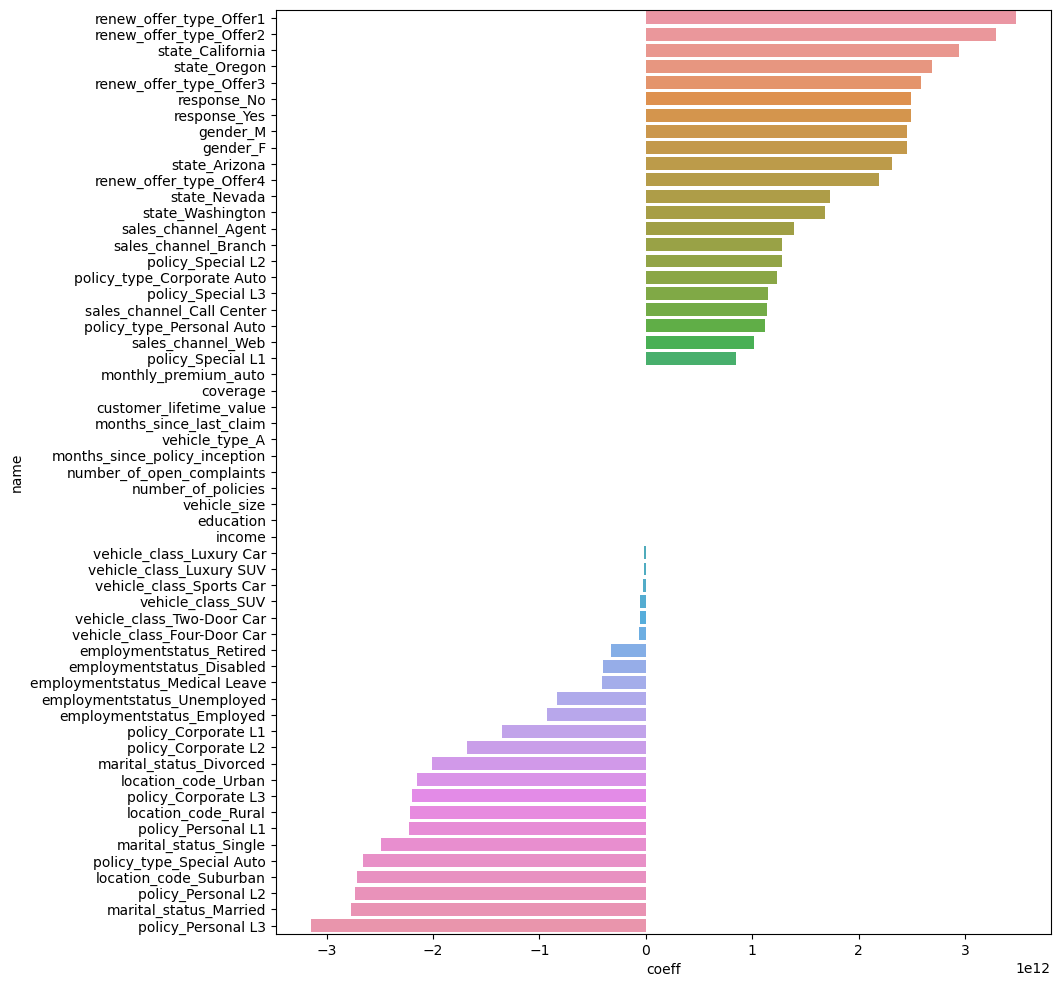

In [553]:
plt.figure(figsize=(10,12))
sns.barplot(y= fi_df['name'], x = fi_df['coeff'])